In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from commando import ComManDo
from commando.evaluation import generate_figure, test_partial
import matplotlib.pyplot as plt
from mmd_wrapper import mmd_combine
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing

2022-04-05 20:22:55.307201: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-05 20:22:55.307235: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
data1 = np.loadtxt("../data/UnionCom/scGEM/GeneExpression.txt")
data2 = np.loadtxt("../data/UnionCom/scGEM/DNAmethylation.txt")
type1 = np.loadtxt("../data/UnionCom/scGEM/type1.txt")
type2 = np.loadtxt("../data/UnionCom/scGEM/type2.txt")
type1 = type1.astype(np.int)
type2 = type2.astype(np.int)

# Sampling
# idx = np.random.choice(range(data1.shape[0]), 50, replace=False)
# data1, data2, type1, type2 = (x[idx] for x in (data1, data2, type1, type2))

# Labels
type_func = lambda x: {1:'BJ', 2:'d8', 3:'d16T+', 4:'d24T+', 5:'IPS'}[x]
labels = [np.array([type_func(j) for j in i]) for i in (type1,type2)]

# Preprocessing
data1 = preprocessing.scale(data1, axis=0)
data2 = preprocessing.scale(data2, axis=0)
dataset = [data1, data2]

# Utility
positivize = lambda X: [(1 + preprocessing.scale(1 + x)) / 2 for x in X]

In [4]:
# Reduced Priors
full_priors = np.eye(len(dataset[0]))

random_idx = np.random.choice(range(len(dataset[0])), int(.5 * len(dataset[0])), replace=False)
priors = np.zeros(len(dataset[0]))
priors[random_idx] = 1
half_priors = np.diag(priors)

none_priors = np.zeros((len(dataset[0]), len(dataset[0])))

In [5]:
# Vars
reduced_dim = 32

# ComManDo

In [6]:
cm = ComManDo(output_dim=reduced_dim, epoch_DNN=2000, log_DNN=500)
cm_data = cm.fit_transform(dataset=dataset)

use random seed: 666
Shape of Raw data
Dataset 0: (177, 34)
Dataset 1: (177, 27)
Device: cpu
---------------------------------
Find correspondence between Dataset 1 and Dataset 2
epoch:[500/2000] err:0.9016 alpha:3.3532
epoch:[1000/2000] err:0.8065 alpha:3.4468
epoch:[1500/2000] err:0.7737 alpha:3.4895
epoch:[2000/2000] err:0.7415 alpha:3.5167
Finished Matching!
---------------------------------
Performing NLMA
epoch:[500/2000]: loss:0.625286
epoch:[1000/2000]: loss:0.548882
epoch:[1500/2000]: loss:0.584958
epoch:[2000/2000]: loss:0.525431
Finished Mapping!
Setup: 0.0026442550006322563
Get subset samples: 0.0002912835865517991
Run model: 0.0013374018600297859
Reconstruction loss: 5.772048758808523e-05
Difference calculation: 0.0005649238515270554
Aligned loss: 4.107646800184739e-05
F-cross loss: 1.3431658539047931e-05
F-inv-cross loss: 1.4051802485482767e-05
Step: 0.003016610285028946
Output: 0.0021453139997902326
Total: 0.010126069000174539
---------------------------------
ComManDo D

In [7]:
cm_data_half = ComManDo(output_dim=reduced_dim, epoch_DNN=2000, log_DNN=500, P=half_priors).fit_transform(dataset=dataset)
cm_data_none = ComManDo(output_dim=reduced_dim, epoch_DNN=2000, log_DNN=500, P=none_priors).fit_transform(dataset=dataset)

use random seed: 666
Shape of Raw data
Dataset 0: (177, 34)
Dataset 1: (177, 27)
Device: cpu
---------------------------------
Find correspondence between Dataset 1 and Dataset 2
epoch:[500/2000] err:0.9016 alpha:3.3532
epoch:[1000/2000] err:0.8065 alpha:3.4468
epoch:[1500/2000] err:0.7737 alpha:3.4895
epoch:[2000/2000] err:0.7415 alpha:3.5167
Finished Matching!
---------------------------------
Performing NLMA
epoch:[500/2000]: loss:0.637142
epoch:[1000/2000]: loss:0.514593
epoch:[1500/2000]: loss:0.520268
epoch:[2000/2000]: loss:0.504749
Finished Mapping!
Setup: 0.003131071000098018
Get subset samples: 0.00032939811150936295
Run model: 0.0013656698425184004
Reconstruction loss: 6.028396148212778e-05
Difference calculation: 0.0005924824324865767
Aligned loss: 4.2025809045298954e-05
F-cross loss: 1.3932211986684706e-05
F-inv-cross loss: 1.4539490528477472e-05
Step: 0.0031173953719880955
Output: 0.0019547069969121367
Total: 0.010621505228555178
---------------------------------
ComManDo

# UnionCom

In [8]:
uc = ComManDo(project_mode='tsne', output_dim=reduced_dim)
uc_data = uc.fit_transform(dataset=positivize(dataset))

use random seed: 666
Shape of Raw data
Dataset 0: (177, 34)
Dataset 1: (177, 27)
Device: cpu
---------------------------------
Find correspondence between Dataset 1 and Dataset 2
epoch:[500/2000] err:0.9020 alpha:3.3540
epoch:[1000/2000] err:0.8068 alpha:3.4477
epoch:[1500/2000] err:0.7740 alpha:3.4904
epoch:[2000/2000] err:0.7421 alpha:3.5177
Finished Matching!
---------------------------------
Begin finding the embedded space
epoch:[10/100]: loss:1.935589, align_loss:0.131565
epoch:[20/100]: loss:1.509872, align_loss:0.097724
epoch:[30/100]: loss:1.320364, align_loss:0.085334
epoch:[40/100]: loss:1.496087, align_loss:0.087746
epoch:[50/100]: loss:1.374307, align_loss:0.078140
epoch:[60/100]: loss:1.162812, align_loss:0.082964
epoch:[70/100]: loss:1.262273, align_loss:0.075555
epoch:[80/100]: loss:1.337930, align_loss:0.078837
epoch:[90/100]: loss:1.315040, align_loss:0.078224
epoch:[100/100]: loss:1.245573, align_loss:0.082542
Done
---------------------------------
ComManDo Done!
Dis

# Nonlinear Manifold Alignment

In [9]:
nlma_data, _ = mmd_combine(*dataset, method='maninetcluster', alignment='nonlinear manifold aln', num_dims=reduced_dim)

In [10]:
nlma_data_half, _ = mmd_combine(*dataset, method='maninetcluster', alignment='nonlinear manifold aln', num_dims=reduced_dim, corr=half_priors)

# Figure Generation

/home/thema/miniconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:290: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= np.linalg.norm(y)
/home/thema/miniconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:290: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= np.linalg.norm(y)


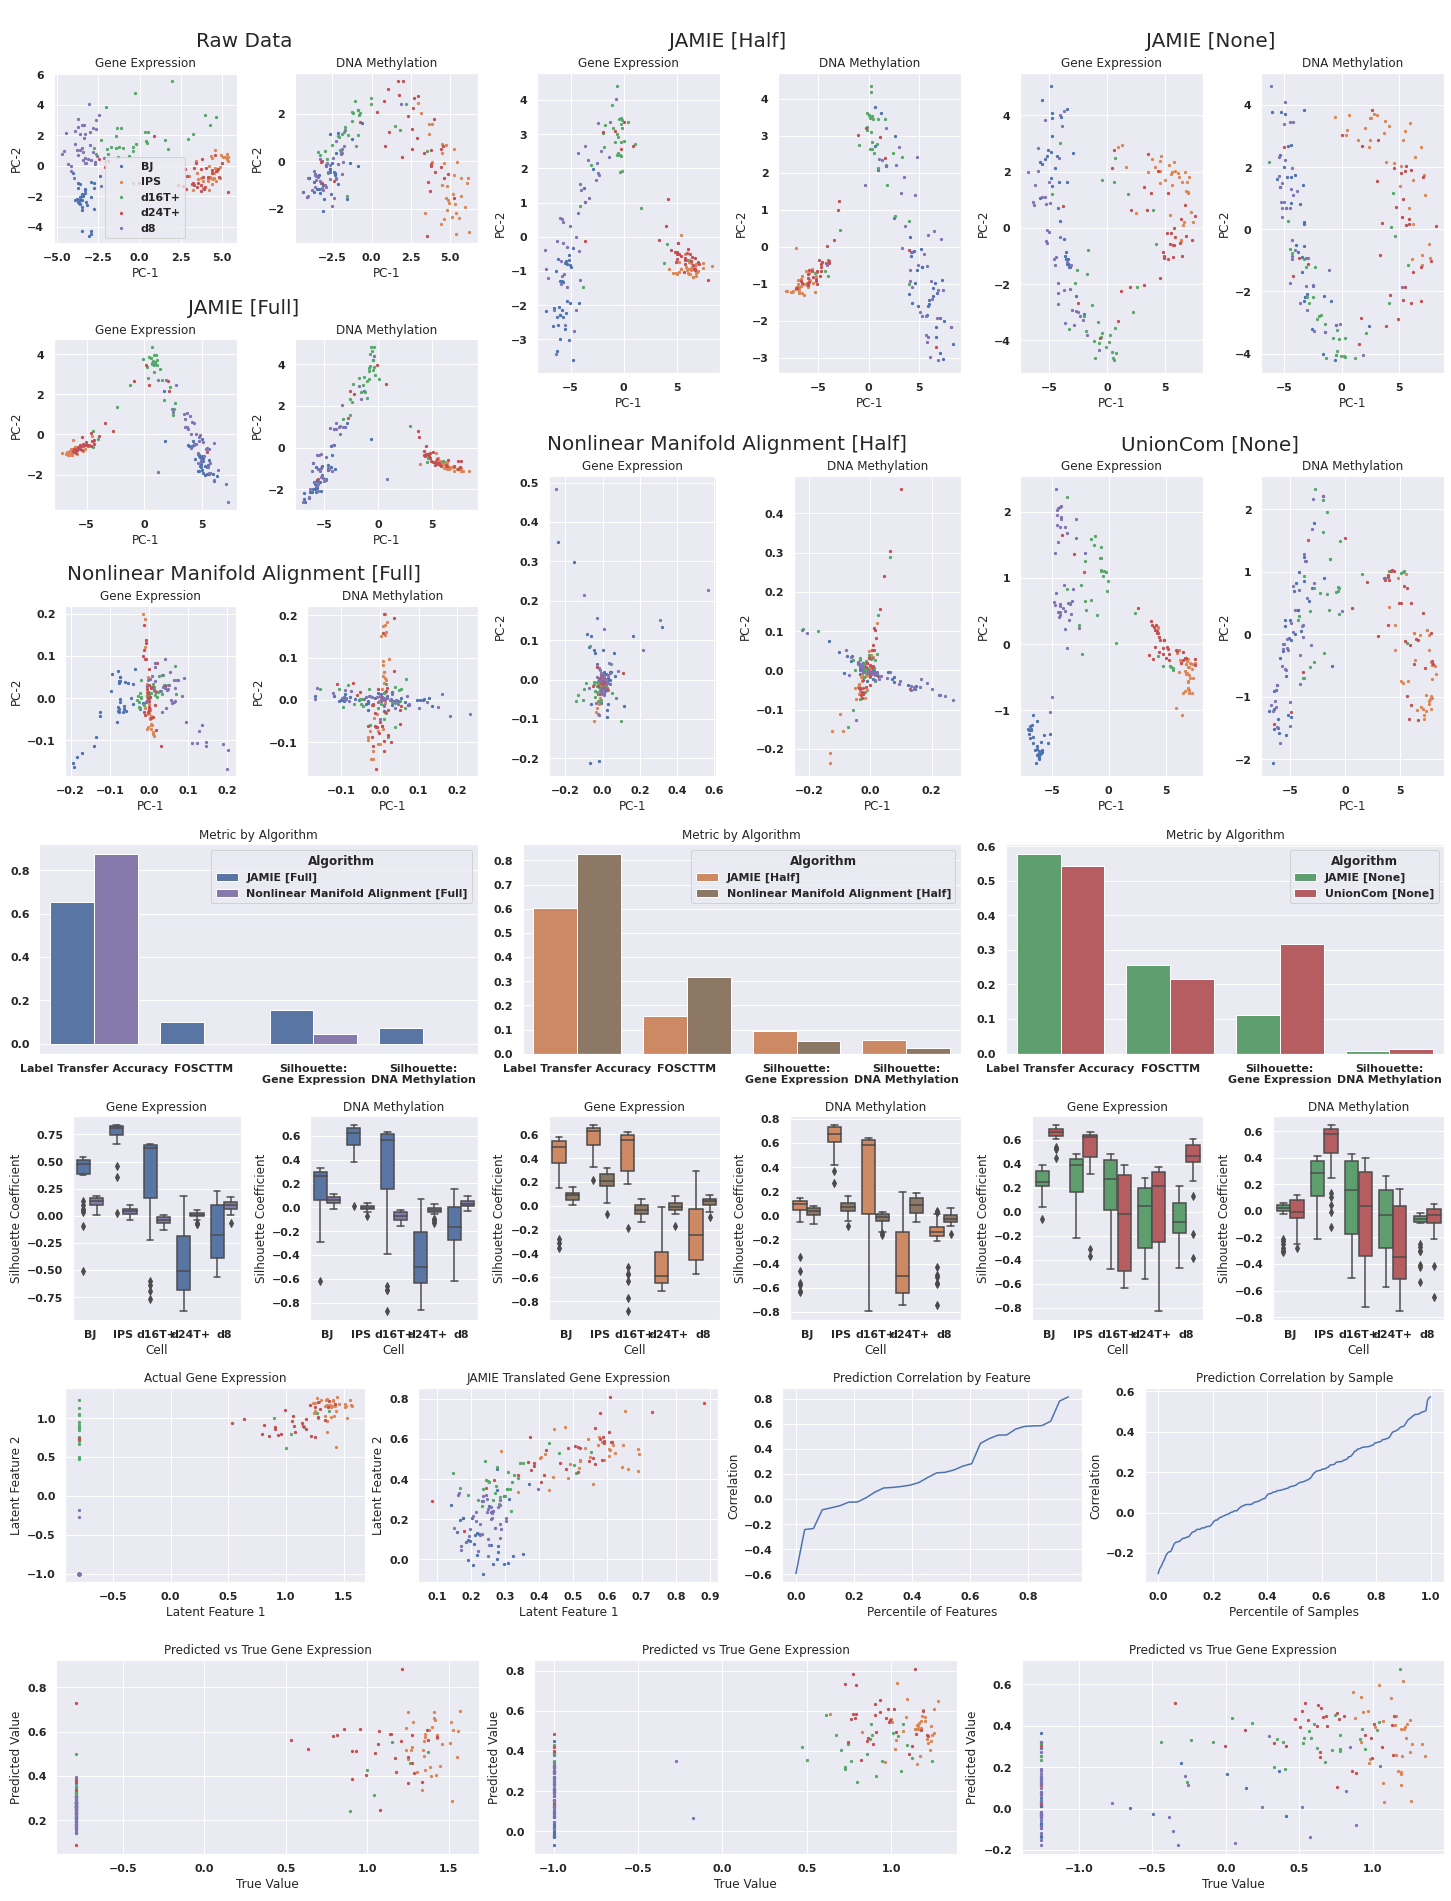

In [11]:
#%%capture --no-display
params = {
    'dataset_names': ['Gene Expression', 'DNA Methylation'],
    'integrated_data': [cm_data, cm_data_half, cm_data_none, uc_data, nlma_data, nlma_data_half],
    'integrated_alg_names': ['JAMIE [Full]', 'JAMIE [Half]', 'JAMIE [None]', 'UnionCom [None]', 'Nonlinear Manifold Alignment [Full]', 'Nonlinear Manifold Alignment [Half]'],
    'alg_groups': [0, 1, 2, 2, 0, 1],
    'raw_data_group': 0,
    'integrated_rows': 1,
    'scale': 20,
    'integrated_use_pca': True,
    'exclude_predict': [(0, 1)],
    'skip_partial': True,
    'skip_nn': True,
    'skip_simple': True,
}
generate_figure(cm, dataset, labels, **params);